# Data Preprocessing for Titanic Life Prediction

**About the Titanic Life Prediction**<br><br>
This project uses the built-in `titanic` dataset from the Seaborn library, which contains information about 891 passengers aboard the ill-fated voyage, representing approximately 40% of the actual passengers on board. Each row in the dataset represents a passenger, with various attributes that provide insights into their background, ticket information, and most importantly, whether they survived the disaster.

Logistic regression is particularly well-suited for the Titanic dataset because it addresses the fundamental classification problem inherent in the data: predicting whether a passenger survived or perished based on various predictor variables. The primary target variable (`survived`) is binary - passengers either survived (1) or died (0). Logistic regression is specifically designed for binary outcomes, making it a natural choice for this type of classification task. It doesn't just predict class labels; it provides probability estimates of survival.

## Libraries
- Numpy and pandas
- Matplotlib and Seaborn
- Warnings (to avoid minor errors)

# Tasks
- Import Libraries
- Load Dataset
- Understanding Dataset
- Sanity Check
- Exploratory Data Analysis
- Handling Missing Values
- Handle Categorical Values
- Handle Outliers
- Data Type Optimization
- Feature Engineering
- Save The File

# Import libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
# loading dataset from seaborn library
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Dataset Description
| Column Name   | Data Type     | Description                                                                         |
| ------------- | ------------- | ----------------------------------------------------------------------------------- |
| `survived`    | int (0 or 1)  | Survival status (0 = No, 1 = Yes)                                                   |
| `pclass`      | int (1, 2, 3) | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)                                            |
| `sex`         | category      | Gender of the passenger (`male` or `female`)                                        |
| `age`         | float         | Age of the passenger in years                                      |
| `sibsp`       | int           | Number of siblings/spouses aboard                                                   |
| `parch`       | int           | Number of parents/children aboard                                                   |
| `fare`        | float         | Passenger fare (in British Pounds)                                                  |
| `embarked`    | category      | Port of embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton)          |
| `class`       | category      | Passenger class as a label (`First`, `Second`, `Third`)                             |
| `who`         | category      | Person type (`man`, `woman`, `child`)                                               |
| `adult_male`  | bool          | Whether the passenger is an adult male (`True` or `False`)                          |
| `deck`        | category      | Deck level (A–G); extracted from cabin number; missing if unknown                   |
| `embark_town` | category      | Name of town where the passenger boarded (`Cherbourg`, `Queenstown`, `Southampton`) |
| `alive`       | category      | Survival status as label (`yes`, `no`)                                              |
| `alone`       | bool          | Whether the passenger was alone (no family aboard)                                  |


## Understanding Dataset

In [4]:
# shape of the dataset
row, col = df.shape
print("Number of Rows:", row)
print("Number of Columns:", col)

Number of Rows: 891
Number of Columns: 15


In [5]:
# Quick Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Sanity Check
- Duplicate Handling
- Missing Value Description
- Drop Redundant Columns

## Handling Duplicates

In [7]:
# check duplicates
df.duplicated().sum()

np.int64(107)

In [8]:
# Check what makes records "duplicate"
duplicates = df[df.duplicated()]
print("Sample duplicates:")
print(duplicates.head(10))

Sample duplicates:
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female   NaN      0      0   7.7500        Q   Third   
76          0       3    male   NaN      0      0   7.8958        S   Third   
77          0       3    male   NaN      0      0   8.0500        S   Third   
87          0       3    male   NaN      0      0   8.0500        S   Third   
95          0       3    male   NaN      0      0   8.0500        S   Third   
101         0       3    male   NaN      0      0   7.8958        S   Third   
121         0       3    male   NaN      0      0   8.0500        S   Third   
133         1       2  female  29.0      1      0  26.0000        S  Second   
173         0       3    male  21.0      0      0   7.9250        S   Third   
196         0       3    male   NaN      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
47   woman       False  NaN   Queenstown   yes   True  

**Note:**  We should not drop these duplicates for this dataset even though there are 107 duplicates among 891 entries.

**Why Keep Duplicates**
- *Real-World Reality:* Multiple passengers genuinely had identical characteristics
- *Historical Accuracy:* These represent actual people with same demographics
- *Small Dataset:* With only 891 records, removing 107 (12%) would significantly reduce our dataset
- *No True Duplicates:* Unlike data entry errors, these are legitimate similar cases

**What These Duplicates Likely Represent**
- Multiple passengers of the same age, class, gender traveling alone
- Families with similar characteristics
- Crew members or passengers with identical booking details

## Missing Value Description

In [9]:
# columns with missing values
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [10]:
# missing percantage
df.isnull().sum() / df.shape[0] * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

**Observation and Action**
- Missing Values Identified: `age`, `embarked`, `deck`, `embark_town`
- Immediate Actions: drop `deck`, handle `embark_town` and `embarked`.
- Future Actions: Validate imputations for `age`

In [11]:
# missing value
df[df["embarked"].isnull() == 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


**NOTE:** Since there are only 2 missing values in the `embarked` and `embark_town` column, and they belong to passengers with very similar characteristics, we can impute with mode among similar passengers rather than drop.

In [12]:
# use the most common embarkation port for that passenger's class
common_embarked = df['embark_town'].mode()[0]
df['embark_town'] = df.groupby('pclass')['embark_town'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else common_embarked
)

In [13]:
# check imputation
df.iloc[[61, 829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True


## Drop Redundant Columns
**Less Useful Columns:**
- `embarked` - Derived from `embark_town`
- `class` - Derived from `pclass`
- `adult_male` - Overlaps with `sex` and `who` columns
- `deck` - Too many missing values and may not have strong predictive power
- `alive` - Same as the target variable `survived`

In [14]:
df.drop(['deck', 'embarked', 'alive', 'adult_male', 'class'], axis=1, inplace=True)

In [15]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who',
       'embark_town', 'alone'],
      dtype='object')

# Exploratory Data Analysis

In [16]:
# figure size
plt.figure(figsize=(8, 4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

## Histogram For Missing Value Data Distribution

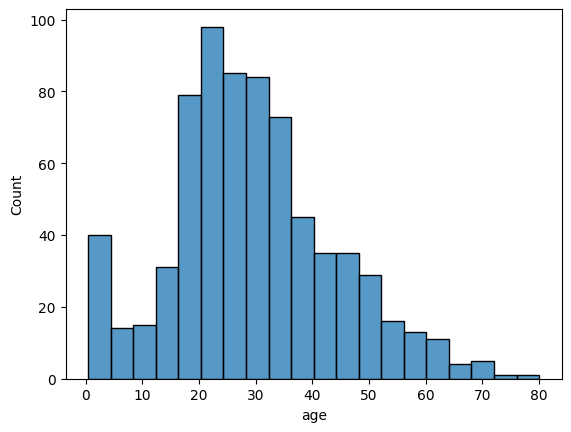

In [17]:
# 'age' variable disribution
sns.histplot(df['age'])
plt.show()

**Plot Analysis**<br><br>
- ***Key Observation:*** The `age` distribution is right-skewed, with most passengers in their 20s and 30s, and very few passengers above 70.<br><br>
- ***Takeaway:*** The dataset reflects a young population, which may influence survival rates and other demographic trends.<br><br>
- ***Decision/Action:*** Validate imputation, analyze survival rates by age group, perform correlation analysis, and engineer new age-related features for modeling.

## Boxplot to Examine Missing Value Distribution Accross Different Variables

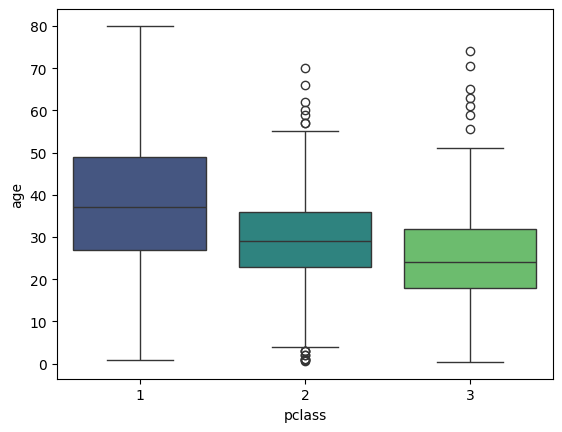

In [18]:
# examine 'age' distribution accross passenger class
sns.boxplot(data=df, x="pclass", y='age', palette='viridis')

# show plot
plt.show()

**Plot Analysis**<br><br>
- ***Key Observation:*** The age distribution varies significantly by passenger class, with Class 1 having older passengers and Classes 2 and 3 having younger passengers. Outliers are present in Classes 2 and 3.<br><br>
- ***Takeaway:*** `age` and `pclass` are strongly correlated, and this relationship may influence survival rates.<br><br>
- ***Decision/Action:*** Validate outliers, analyze survival rates by `age` and `pclass`, perform correlation analysis. Need to use a robust model

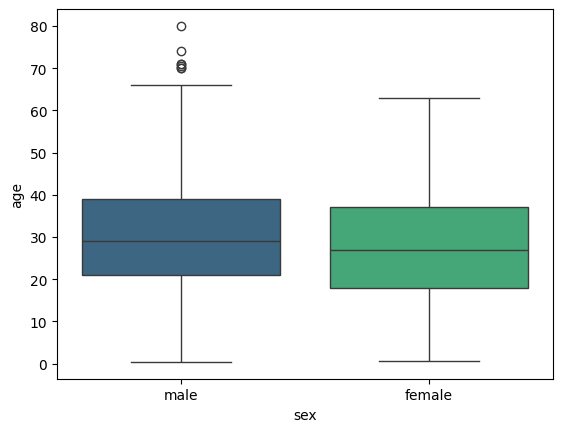

In [19]:
# examine 'age' distribution accross gender
sns.boxplot(data=df, x="sex", y='age', palette='viridis')

# show plot
plt.show()

**Plot Analysis**
- ***Key Observation:*** The boxplot reveals distinct `age` distributions between males and females, with males having a wider age range and some extreme outliers. This insight supports the use of segmentation-based imputation strategies to handle missing age values effectively.<br><br>
- ***Takeway:*** The boxplot analysis highlights the importance of considering gender differences in age distributions when developing imputation strategies, suggesting that a gender-specific approach may be more effective in handling missing age values.<br><br>
- ***Decision/Action:*** Consider implementing a gender-specific imputation strategy that takes into account the distinct age distributions between males and females. This could involve using different imputation models or techniques for each gender group to better capture their respective age patterns.

## Handling Missing Values

In [20]:
#  use group median age by sex and class
df['age'] = df.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.median()))

In [21]:
# check missing value status
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
embark_town    0
alone          0
dtype: int64

## Univariate Analysis

### countplot for unique value distribution

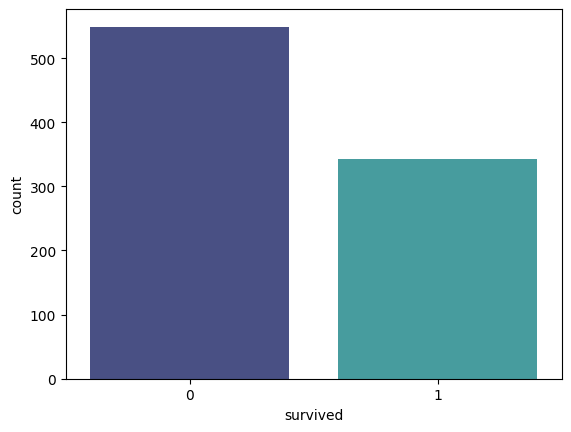

In [22]:
# countplot for survival
sns.countplot(data=df, x="survived", palette="mako")

# show plot
plt.show()

**Plot Analysis**<br><br>
The chart clearly illustrates the significant imbalance in survival outcomes, with far more passengers perishing than surviving. It shows that the survival rate is not significantly affected by the number of passengers on board. This suggests that the number of passengers may not be a critical factor in determining survival outcomes in this scenario.

In [23]:
# exact value of total survived
df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

### distplot for density distribution

<Axes: xlabel='age', ylabel='Density'>

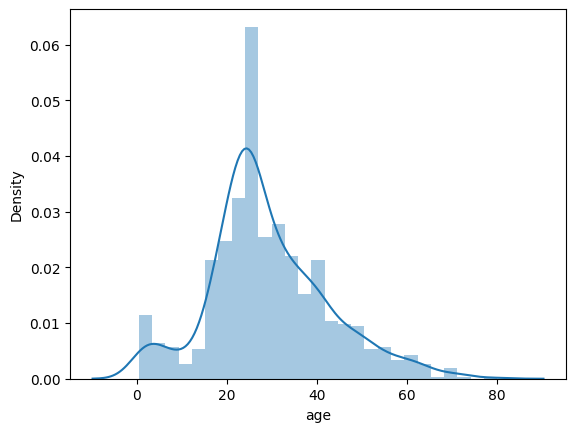

In [24]:
# distplot for age variable
sns.distplot(df['age'])

**Plot Analysis**
- ***Key Observation:*** The density plot reveals a right-skewed age distribution, with most passengers being young adults (20–30 years old) and a notable presence of children.<br><br>
- ***Takeway:*** This insight highlights the importance of age as a key demographic factor in understanding survival patterns during the Titanic disaster.<br><br>
- ***Decision/Action:*** To further investigate the relationship between age and survival, we can explore the distribution of survivors and non-survivors across different age groups.

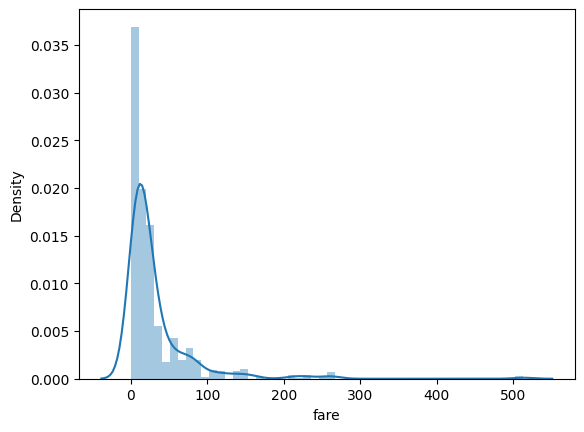

In [25]:
# distplot for fare variable
sns.distplot(df['fare'])

plt.show()

**Plot Analysis**
- ***Key Observation:*** The density plot reveals a right-skewed fare distribution, with most passengers paying low fares and a few paying significantly higher fares.<br><br>
- ***Takeway:*** This insight highlights the importance of fare as a key economic factor in understanding survival patterns during the Titanic disaster.<br><br>
- ***Decision/Action:*** To further investigate the relationship between fare and survival, we can explore the distribution of fares among different passenger classes and analyze the correlation between fare and survival rates.

## Bivariate Analysis
**Purpose of Survival Distribution Countplots**
1. Survival by Alone Status
    - Purpose: Examine how traveling alone vs. with family affected survival chances
    - Insight: Reveals whether passengers traveling alone had different survival rates compared to those with companions
    - Historical Context: Helps understand if family groups received priority during evacuation
2. Survival by Person Type (who)
    - Purpose: Analyze survival rates across different demographic groups (men, women, children)
    - Insight: Shows the "women and children first" policy effectiveness and gender-based survival disparities
    - Historical Context: Validates maritime evacuation protocols and social priorities of the era
3. Survival by Embarkation Town
    - Purpose: Investigate whether departure port influenced survival outcomes
    - Insight: Reveals potential correlations between embarkation location and survival rates
    - Historical Context: May reflect passenger demographics, class distributions, or boarding procedures at different ports
4. Survival by Passenger Class
    - Purpose: Examine class-based disparities in survival rates
    - Insight: Demonstrates socioeconomic factors affecting access to lifeboats and rescue resources
    - Historical Context: Highlights class divisions and their impact on survival during the disaster

<br>These four countplots serve to visualize and analyze the relationship between passenger survival and key demographic/categorical variables

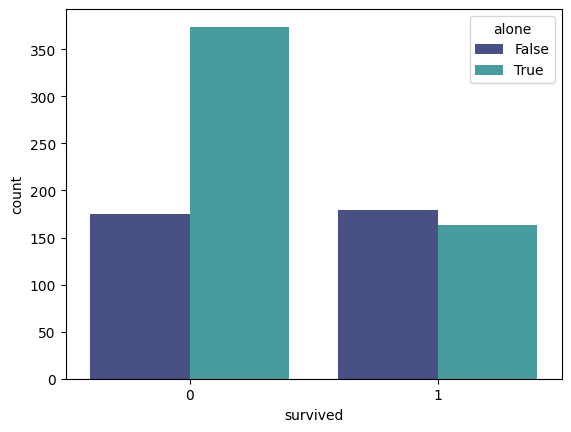

In [26]:
# countplot for survived with chances
sns.countplot(data=df, x="survived", hue="alone", palette="mako")

# show plot
plt.show()

**Plot Analysis**<br><br>
The chart reveals that a higher proportion of passengers who traveled alone did not survive compared to those who were not alone. This insight highlights the potential importance of the alone feature in predicting survival outcomes.

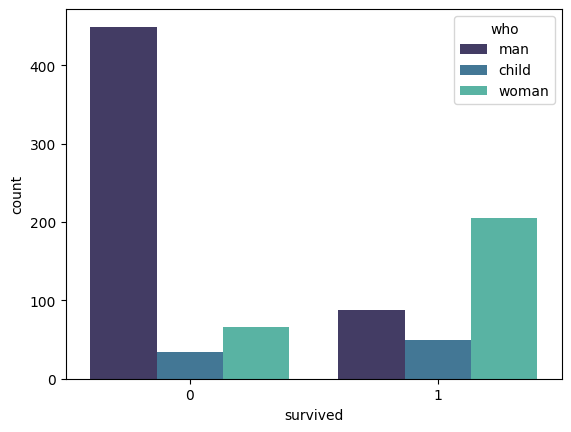

In [27]:
# countplot for specific person
sns.countplot(df, x='survived', hue='who', palette="mako")

plt.show()

**Plot Analysis**
- ***Key Observation:*** The chart clearly illustrates significant differences in survival outcomes based on the role (`who`). Men faced the highest mortality risk, while women had the highest survival rate, reflecting historical rescue priorities.<br><br>
- ***Takeway:*** This insight highlights the importance of the `who` feature in predicting survival and warrants further investigation into underlying causes.<br><br>
- ***Decision/Action*** To better understand the impact of `who` on survival, consider analyzing the distribution of `who` across different age groups and exploring potential correlations with other features like `age` and `sex`.

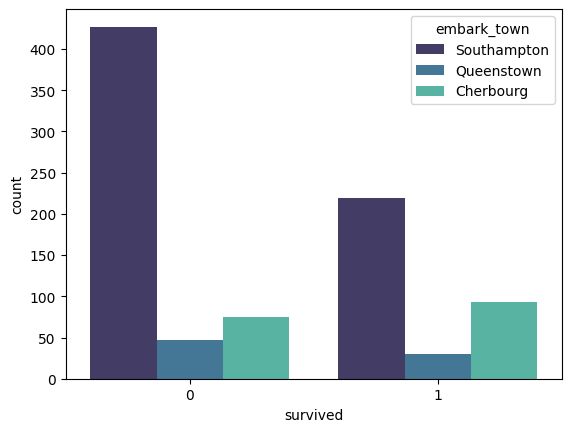

In [28]:
# countplot for embark_town
sns.countplot(df, x='survived', hue='embark_town', palette="mako")

plt.show()

**Plot Analysis**<br><br>
- ***Key Observation:*** The chart reveals significant differences in survival outcomes based on the embarkation town (`embark_town`). Southampton had the highest number of passengers and the highest mortality rate, while Queenstown had the lowest survival rate. Cherbourg showed a more balanced distribution.<br><br>
- ***Takeway:*** These insights highlight the importance of the embark_town feature in predicting survival and warrant further investigation into underlying causes.<br><br>
- ***Decision/Action:*** To better understand the relationship between embarkation town and survival, this could provide valuable context for the observed differences. 

In [29]:
# exact value count
df.groupby(['embark_town', 'survived'])['survived'].count()

embark_town  survived
Cherbourg    0            75
             1            93
Queenstown   0            47
             1            30
Southampton  0           427
             1           219
Name: survived, dtype: int64

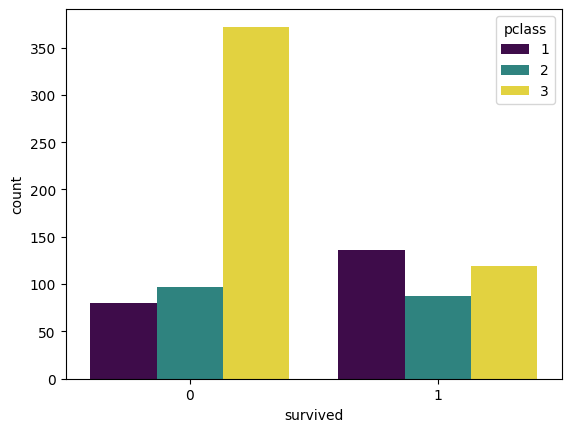

In [30]:
# countplot for passenger class
sns.countplot(df, x='survived', hue='pclass', palette="viridis")

plt.show()

**Plot Analysis**
- ***Key Observation:*** The chart clearly illustrates significant differences in survival outcomes based on passenger class (pclass). Third-class passengers faced the highest mortality rate, while first-class passengers had the highest survival rate.<br><br>
- ***Takeway:*** These insights highlight the importance of the pclass feature in predicting survival and warrant further investigation into underlying causes.<br><br>
- ***Decision/Action:*** To better understand the relationship between pclass and survival, we will explore additional features related to passenger class, such as embarkation point.

### Binary analysis summary: All variable interactions presented side by side

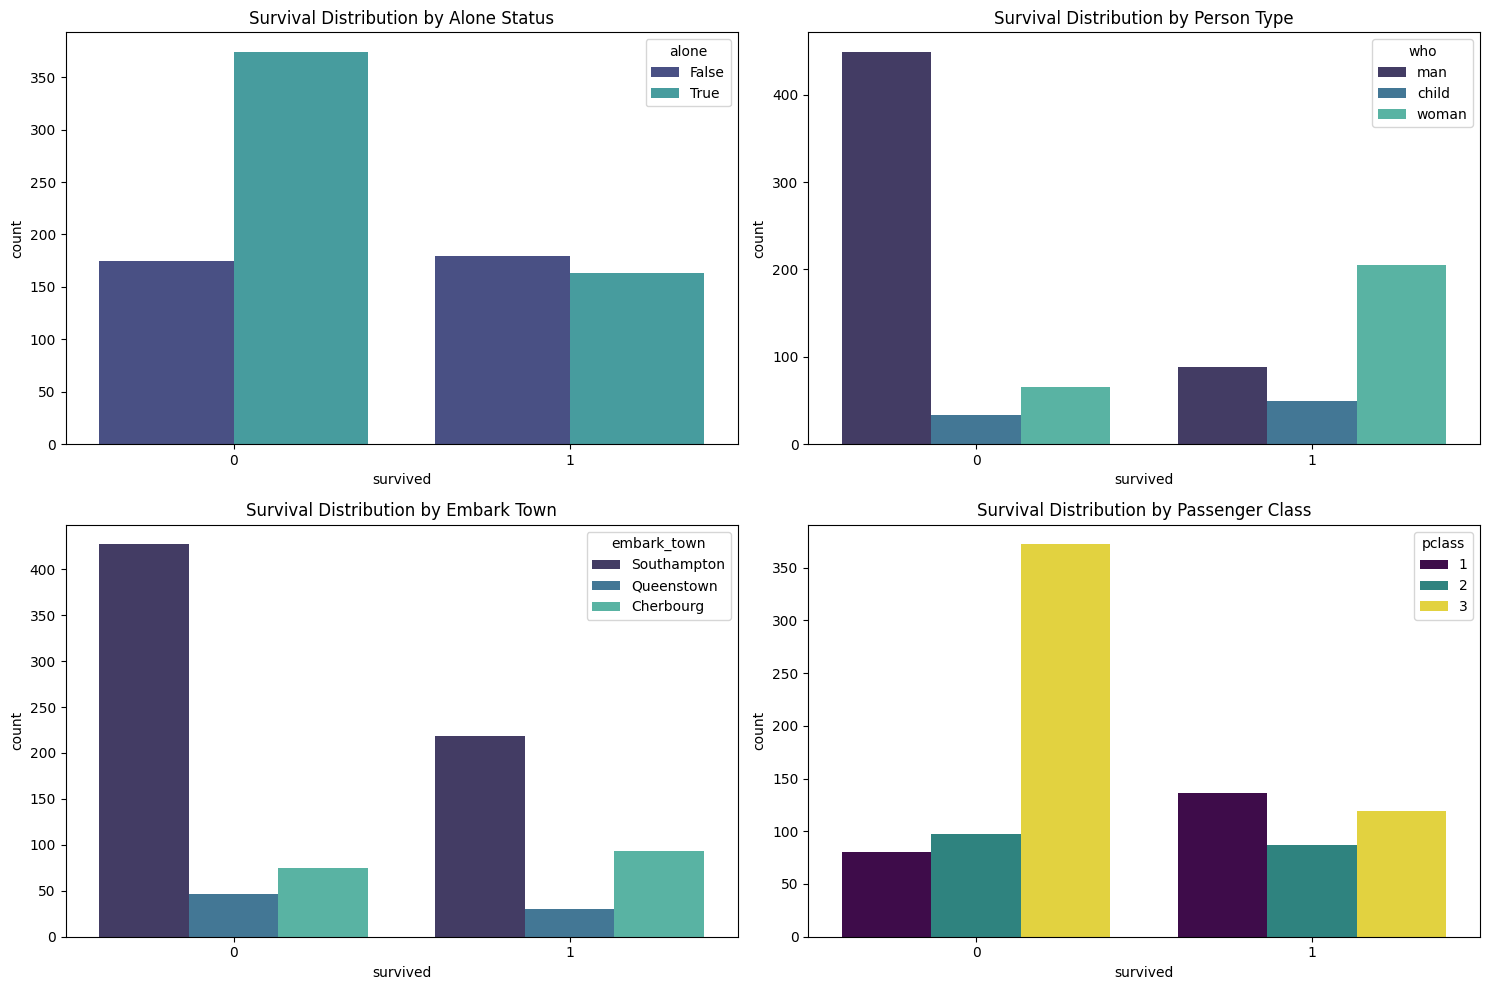

In [31]:
# Define the plots configuration
plots_config = [
    {"hue": "alone", "palette": "mako", "title": "Survival Distribution by Alone Status"},
    {"hue": "who", "palette": "mako", "title": "Survival Distribution by Person Type"},
    {"hue": "embark_town", "palette": "mako", "title": "Survival Distribution by Embark Town"},
    {"hue": "pclass", "palette": "viridis", "title": "Survival Distribution by Passenger Class"}
]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loop through configurations and create plots
for i, config in enumerate(plots_config):
    row = i // 2
    col = i % 2
    
    sns.countplot(data=df, x="survived", hue=config["hue"], 
                  palette=config["palette"], ax=axes[row, col])
    axes[row, col].set_title(config["title"])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Heatmap for correlation matrix

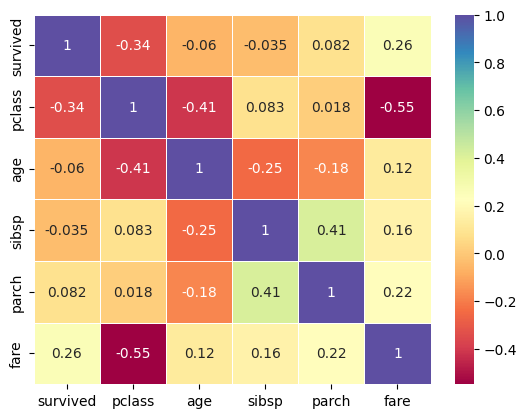

In [32]:
# correlation heatmap
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="Spectral", linewidths=0.5)

# show the plot
plt.show()

**Plot Analysis**<br><br>
Based on the heatmap, 
- Columns to Keep:
    - Essential Features:
        - pclass: Strongly correlated with survival.
        - fare: Strongly correlated with survival and provides additional information about economic status.
        - sex: Typically has a strong correlation with survival (though not shown in this heatmap).<br><br>
- Columns to Remove:
    - Low Impact Features:
        - age: Very weak correlation with survival.
        - parch & sibsp: `alone` variable would be enough to predict

In [33]:
# action based on the heatmap
# drop redundant columns that don't significantly impact on the model building
df.drop(['age', 'parch', 'sibsp'], axis=1, inplace=True)

In [34]:
df.head()

,survived,pclass,sex,fare,who,embark_town,alone
0,0,3,male,7.2500,man,Southampton,False
1,1,1,female,71.2833,woman,Cherbourg,False
2,1,3,female,7.9250,woman,Southampton,True
3,1,1,female,53.1000,woman,Southampton,False
4,0,3,male,8.0500,man,Southampton,True


# Categorical Encoding
Label encoding can be affected by the correlations shown in the heatmap so the better approach is One-hot encoding. This ensures categorical data is properly represented for accurate machine learning model training and prediction.

In [35]:
# categorical columns
category = df.select_dtypes(include="object")
category

,sex,who,embark_town
0,male,man,Southampton
1,female,woman,Cherbourg
2,female,woman,Southampton
3,female,woman,Southampton
4,male,man,Southampton
...,...,...,...
886,male,man,Southampton
887,female,woman,Southampton
888,female,woman,Southampton
889,male,man,Cherbourg


In [36]:
# one-hot encoded dataframe
df = pd.get_dummies(df, columns=category.columns, drop_first=True)

# new encoded dataset
df.head()

,survived,pclass,fare,alone,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,0,3,7.2500,False,True,True,False,False,True
1,1,1,71.2833,False,False,False,True,False,False
2,1,3,7.9250,True,False,False,True,False,True
3,1,1,53.1000,False,False,False,True,False,True
4,0,3,8.0500,True,True,True,False,False,True


# Save Clean Data Before Modeling

In [37]:
df.to_csv("data/titanic_clean.csv", index=False)